## A Visual History of Nobel Prize Winners

The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src="https://upload.wikimedia.org/wikipedia/en/e/ed/Nobel_Prize.png" width="290" title="Nobel Prize Medal" alt="Nobel Prize Medal">

The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 800)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')
%matplotlib inline

**Load the dataset**

In [2]:
nobel_df = pd.read_csv("nobel.csv")
print("Dataset loaded\n")
nobel_df.head(5)

Dataset loaded



,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
print('The dataset has {} rows and {} columns'.format(*nobel_df.shape))

The dataset has 911 rows and 18 columns


In [4]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


In [5]:
nobel_df.isnull().any()

year                    False
category                False
prize                   False
motivation              True 
prize_share             False
laureate_id             False
laureate_type           False
full_name               False
birth_date              True 
birth_city              True 
birth_country           True 
sex                     True 
organization_name       True 
organization_city       True 
organization_country    True 
death_date              True 
death_city              True 
death_country           True 
dtype: bool

**Unique Prize Categories**

In [6]:
unique_categories = pd.Series(data=nobel_df['category'].unique())
unique_categories.index += 1
unique_categories

1    Chemistry 
2    Literature
3    Medicine  
4    Peace     
5    Physics   
6    Economics 
dtype: object

**Yearly Statistics Nobel Prize awards**

In [7]:
year_counts = nobel_df['year'].value_counts().to_frame().rename(columns={'year':'count'})
max_year = year_counts['count'].idxmax()
max_year_count = year_counts.at[max_year, "count"]
print('Year: {:>6}\nAwards: {}'.format(max_year, max_year_count))

Year:   2001
Awards: 15


- Let's visualize number of Awards per year

<BarContainer object of 113 artists>

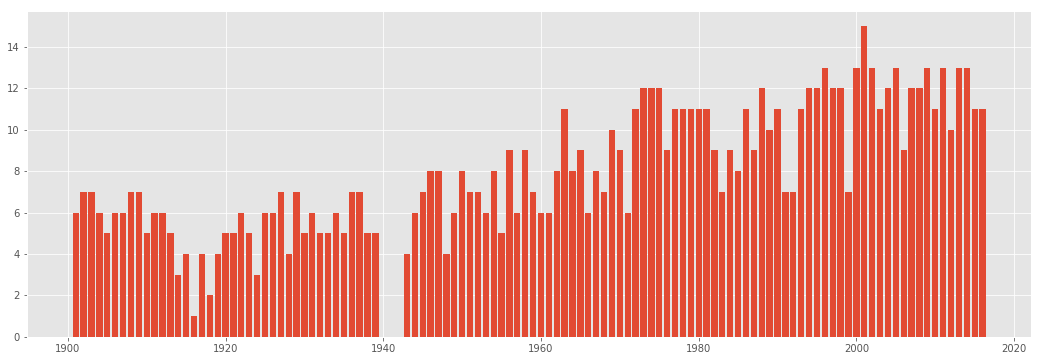

In [8]:
plt.figure(figsize=(18,6))
plt.bar(year_counts.index, year_counts['count'])

- From the above visualization, we observe that there is an increasing trend in the number of Nobel Prize recipients between the years 1900 to 2016.

- There is another interesting observation from the bar chart that there are some missing bars near the `1940 year mark`. 

- If you search on the internet about this missing trend, you'll find that *no Nobel prize were awarded in any category from* `1940` *to* `1942`.

In [9]:
years = list(nobel_df['year'])
for year in range(1938, 1946):
    if year in years:
        print('{} Nobel prizes were awared in {}\n'.format(year_counts.at[year,'count'], year))
    else:
        print('No Nobel prize was awarded in {}\n'.format(year))

5 Nobel prizes were awared in 1938

5 Nobel prizes were awared in 1939

No Nobel prize was awarded in 1940

No Nobel prize was awarded in 1941

No Nobel prize was awarded in 1942

4 Nobel prizes were awared in 1943

6 Nobel prizes were awared in 1944

7 Nobel prizes were awared in 1945



**Individual vs Shared Nobel Prize Recipients**

Let's determine the number of shared and individual prize winners:
- 1/1 : Individual
- 1/2 : Prize shared among 2
- 1/3 : Prize shared among 3
- 1/4 : Prize shared among 4

In [10]:
nobel_df['prize_share'].value_counts()

1/1    344
1/2    306
1/3    201
1/4    60 
Name: prize_share, dtype: int64

**So, who gets the Nobel Prize?**

Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

(For country, we will use the `birth_country` of the winner, as the `organization_country` is `NaN` for all shared Nobel Prizes.)

- Number of (possibly shared) Nobel Prizes handed out between `1901` and `2016`.

In [11]:
len(nobel_df)

911

- Number of Nobel Prizes won by `male` and `female` reciepients

In [12]:
nobel_df['sex'].value_counts()

Male      836
Female    49 
Name: sex, dtype: int64

- Number of Nobel Prizes won by the `top 10 nationalities`

In [13]:
nobel_df['birth_country'].value_counts()[:10]

United States of America    259
United Kingdom              85 
Germany                     61 
France                      51 
Sweden                      29 
Japan                       24 
Netherlands                 18 
Canada                      18 
Russia                      17 
Italy                       17 
Name: birth_country, dtype: int64

**USA Dominance**

From the above analysis, we observe that the `United States of America` has the most number of recipients of Nobel Prizes between 1901 and 2016. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

- Proportion of USA born winners per decade

In [14]:
# Creating a new column in the dataset using the boolean masking method indicating True if a recipient is from USA or False
nobel_df['USA_born'] = nobel_df['birth_country'] == 'United States of America'
# Check the number of recipients from and not from USA
nobel_df['USA_born'].value_counts()

False    652
True     259
Name: USA_born, dtype: int64

In [15]:
# Create a new column in the dataset to create decade values
# Method: Consider, year 1901
# divide 1901 by 10, we get 190.1
# floor or 190.1 is 190
# multiply by 10, we get 1900
nobel_df['decade'] = (np.floor(nobel_df['year']/10)*10).astype(int)
nobel_df['decade'].value_counts()

2000    123
1990    104
1970    104
1980    97 
2010    82 
1960    79 
1950    72 
1900    57 
1930    56 
1920    54 
1940    43 
1910    40 
Name: decade, dtype: int64

In [16]:
prop_usa_born_winners = nobel_df.groupby('decade', as_index=False)['USA_born'].mean()
prop_usa_born_winners

,decade,USA_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


- Let's visualize this dominance of USA

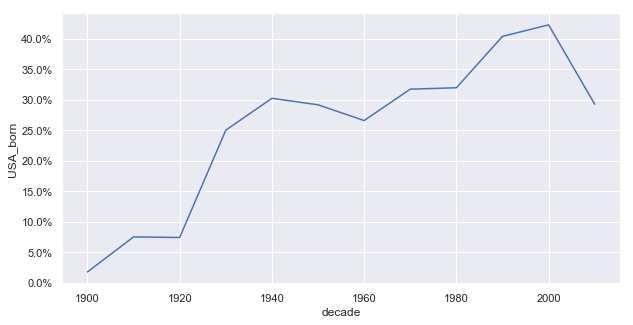

In [17]:
# Set aesthetic parameters in one step
sns.set()
plt.figure(figsize=(10,5))
plot = sns.lineplot(x='decade', y='USA_born', data=prop_usa_born_winners)
# Adding %-formatting to the y-axis
plot.yaxis.set_major_formatter(PercentFormatter(1.0))

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since.

**Gender of a Typical Nobel Prize Winner**

One group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

- Let's calculate the proportion of female laureates per decade

In [18]:
nobel_df['female_recipient'] = nobel_df['sex'] == 'Female'
nobel_df['female_recipient'].value_counts()

False    862
True     49 
Name: female_recipient, dtype: int64

In [19]:
prop_female_recipients = nobel_df.groupby(['decade','category'], as_index=True)['female_recipient'].mean()
prop_female_recipients

decade  category  
1900    Chemistry     0.000000
        Literature    0.100000
        Medicine      0.000000
        Peace         0.071429
        Physics       0.076923
1910    Chemistry     0.125000
        Literature    0.000000
        Medicine      0.000000
        Peace         0.000000
        Physics       0.000000
1920    Chemistry     0.000000
        Literature    0.200000
        Medicine      0.000000
        Peace         0.000000
        Physics       0.000000
1930    Chemistry     0.076923
        Literature    0.111111
        Medicine      0.000000
        Peace         0.111111
        Physics       0.000000
1940    Chemistry     0.000000
        Literature    0.166667
        Medicine      0.071429
        Peace         0.142857
        Physics       0.000000
1950    Chemistry     0.000000
        Literature    0.000000
        Medicine      0.000000
        Peace         0.000000
        Physics       0.000000
1960    Chemistry     0.066667
        Economics   

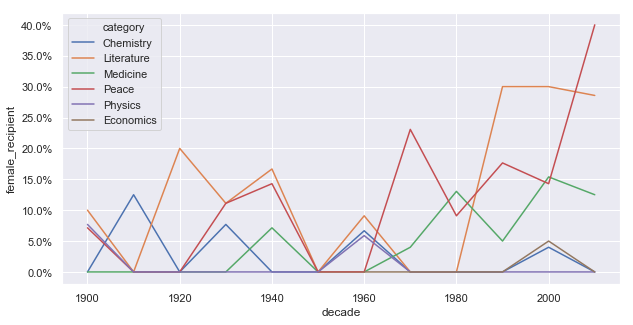

In [20]:
plt.figure(figsize=(10,5))
plot = sns.lineplot(x='decade', y='female_recipient', hue='category', data=prop_female_recipients.reset_index(drop=False))
plot.yaxis.set_major_formatter(PercentFormatter(1.0))

The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

**The First Woman to Win Nobel Prize**

Who was the first woman to receive a Nobel Prize? And in what category? Let's find out.

In [21]:
nobel_df['female_recipient'].value_counts()

False    862
True     49 
Name: female_recipient, dtype: int64

In [22]:
first_female_recipient = nobel_df[nobel_df['sex'] == 'Female'].nsmallest(1, 'year')
first_female_recipient

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade,female_recipient
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel""",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


We see that, `Marie Curie, née Maria Salomea Skłodowska` was the `first woman to win a Nobel Prize in Physics in 1903`.

**Repeat Laureates**

For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? Let's find out.

In [23]:
repeats = nobel_df.groupby('full_name', as_index=False).filter(lambda x: len(x)>=2)
repeats

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade,female_recipient
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel""",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advancement of chemistry by the discovery of the elements radium and polonium, by the isolation of radium and the study of the nature and compounds of this remarkable element""",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (International Committee of the Red Cross),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (International Committee of the Red Cross),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemical bond and its application to the elucidation of the structure of complex substances""",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner for Refugees (UNHCR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and their discovery of the transistor effect""",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, especially that of insulin""",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (International Committee of the Red Cross),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


- Number of Nobel Laureates who have received the Nobel Prize two or more times

In [24]:
len(repeats)

13

- Number of repeat male laureates

In [25]:
male_repeats = repeats[repeats['sex'] == 'Male']
len(male_repeats)

6

- Number of repeat female laureates

In [26]:
female_repeats = repeats[repeats['sex'] == 'Female']
len(female_repeats)

2

- Remaining 5 prize recipients are with unknown data for sex.

**How old are you when you get the prize?**

Let's find out how old were the recipients generally when they got the prize?

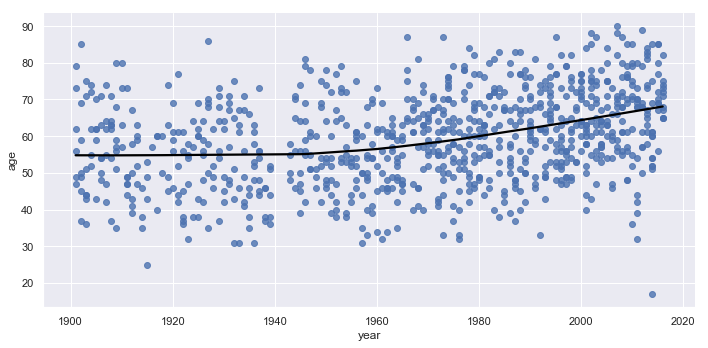

In [27]:
# Converting birth_date from String to datetime
nobel_df['birth_date'] = pd.to_datetime(nobel_df['birth_date'])

# Calculating the age of Nobel Prize winners
nobel_df['age'] = nobel_df['year'] - nobel_df['birth_date'].dt.year

sns.lmplot(x='year', y='age', data=nobel_df, lowess=True, aspect=2, line_kws={'color':'black'})

From the above visualization, we observe that the age of the Nobel prize recipients lie in the range `50-70` years, also we see that there is an increasing trend in the age of recipients in the recent past.

**Age differences between prize categories**

Let's look at age trends within different prize categories.

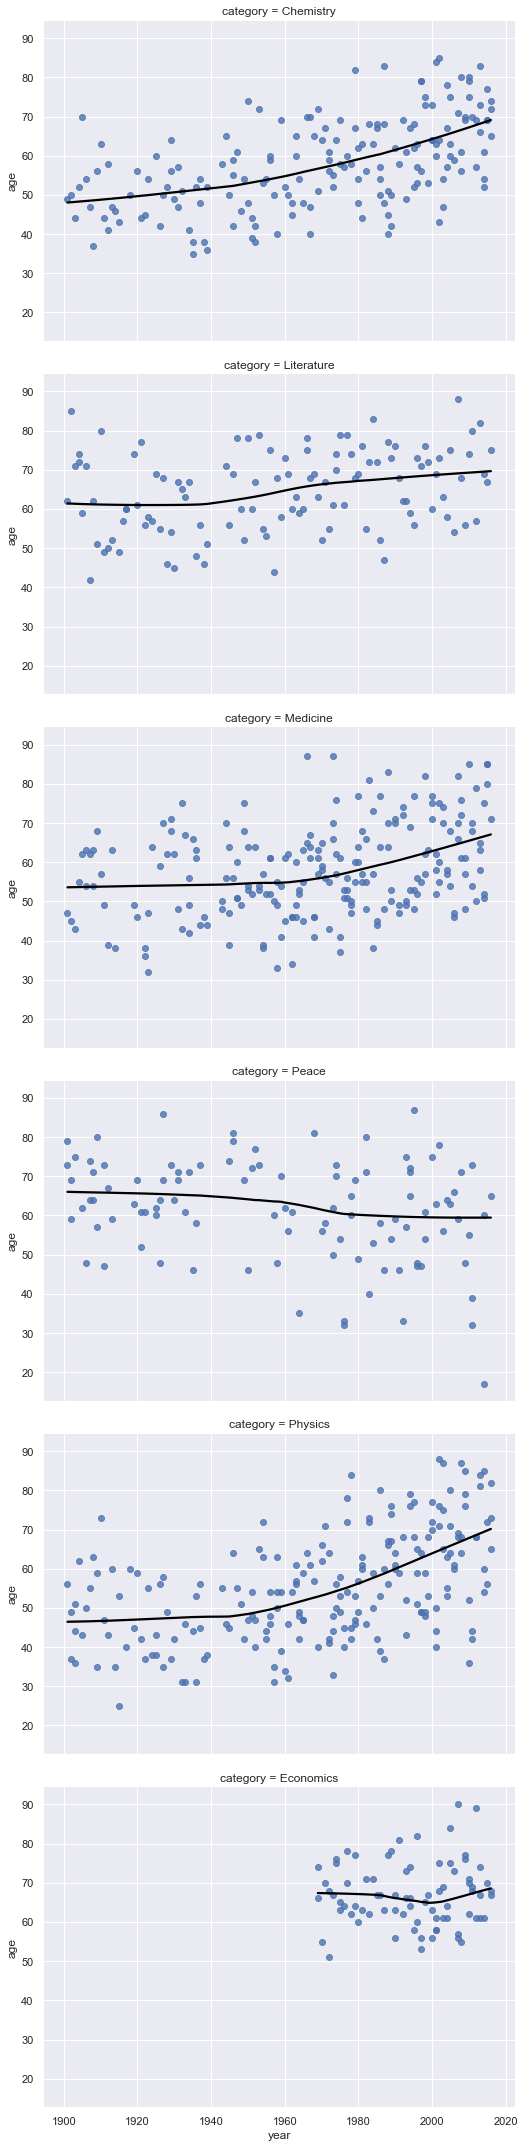

In [28]:
sns.lmplot(x='year', y='age', data=nobel_df, row='category', lowess=True, aspect=1.5, line_kws={'color':'black'})

We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

**Oldest and Youngest Noble Prize Recipients**

Who are the oldest and youngest people ever to have won a Nobel Prize? Let's find out. 

- Oldest Nobel Prize Recipient

In [29]:
nobel_df.nlargest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade,female_recipient,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Sciences 2007,"""for having laid the foundations of mechanism design theory""",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


- Youngest Nobel Prize Recipient

In [30]:
nobel_df.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade,female_recipient,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of children and young people and for the right of all children to education""",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


**Conclusion**

We found some key insights by analyzing the nobel prize data (1901 - 2016)
- United States of America has the most number of recipients of Nobel Prizes (259) between 1901 and 2016
- Year 2001 had the highest number of Nobel prize recipients (15)
- No Nobel prize were awarded in any category from 1940 to 1942
- Marie Curie, née Maria Salomea Skłodowska was the first woman to win a Nobel Prize in Physics in 1903
- 13 laureates have received the Nobel Prize two or more times
- Leonid Hurwicz was 90 years old when he got his prize
- Malala Yousafzai is youngest winner of the Nobel Peace Prize which was awarded to her in 2014